# BOOMBIKES SHARING DEMAND ANALYSIS -

### Problem Statement:

##### A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues. They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

##### You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

Importing necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

from math import sqrt

# 1) Reading, Understanding the data and Pre-processing data

Reading the data

In [2]:
df=pd.read_csv('day.csv')

DATA DICTIONARY-
    - instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

Viewing the data

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Data types

In [4]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Dimensions of the data

In [5]:
df.shape

(730, 16)

Renaming the columns

In [6]:
df.rename(columns = {'yr':'year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 

Converting the data to relevant codeframes as mentioned in the dictionary

In [7]:
df['season']=df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [8]:
df['month'] = df['month'].map({1:'january', 2: 'february', 3: 'march', 4: 'april', 5:'may', 6: 'june', 7: 'july', 8: 'august', 9: 'september', 10: 'october', 11: 'november', 12: 'december'})

In [9]:
weather_sit_dict={1:"Clear",
                     2:"Mist",
                     3:"Light_Snow",
                     4:"Heavy_Rain"}

df['weathersit']=df['weathersit'].map(weather_sit_dict)

In [10]:
df['weekday']=df['weekday'].map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})

Checking for missing values

In [11]:
df.isnull().sum()

instant       0
dteday        0
season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

we can see that instant is an index column  with too many unique values and it wont help us in predictive analytics, so we drop it

In [12]:
df.drop(['instant'],axis=1,inplace=True)

drop dteday as other columns month, year, weekday contain its details

In [13]:
df.drop(['dteday'],axis=1,inplace=True)

# 2) Data Visualizations

1) Season

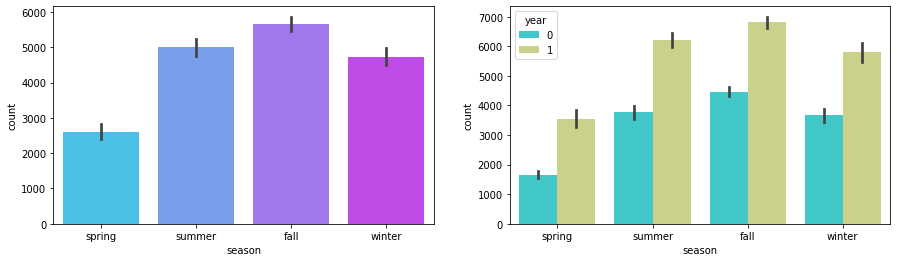

In [19]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.barplot('season','count',data=df,palette="cool")

plt.subplot(1,2,2)
sns.barplot('season','count',data=df,hue='year',palette="rainbow")

Bike rentals are highest in fall,followed by summer. It is lowest in spring season

2) month

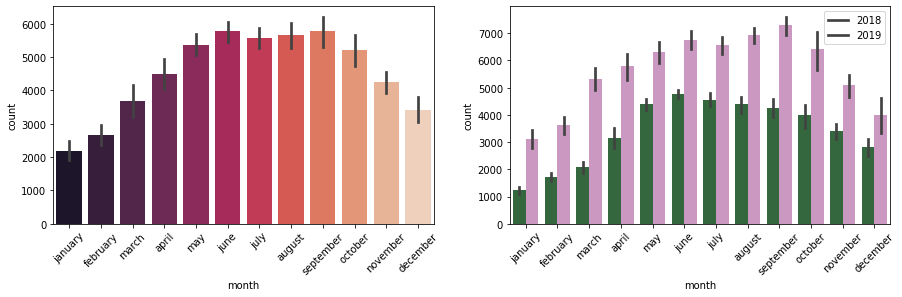

In [17]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.xticks(rotation=45)
sns.barplot('month','count',data=df,palette="rocket")

plt.subplot(1,2,2)
plt.xticks(rotation=45)
sns.barplot('month','count',data=df,palette="cubehelix",hue='year')

Bike rentals are highest in september,followed by june and august. It is lowest in January.

3) weathersit

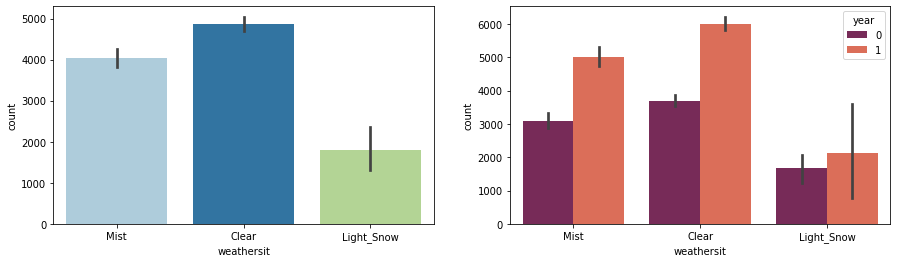

In [20]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.barplot('weathersit','count',data=df,palette="Paired")

plt.subplot(1,2,2)
sns.barplot('weathersit','count',hue='year',data=df,palette="rocket")

Bike rentals for Ligh+snow have not seen a great increase from 2018 to 2019 but has grown significantly with Clear+weathersit and Mist

4) weekday

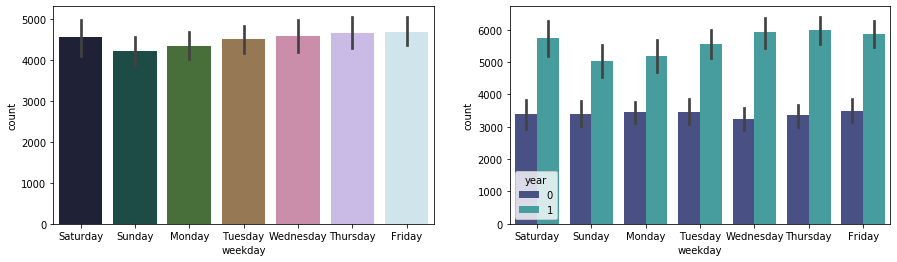

In [111]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.barplot('weekday','count',data=df,palette="cubehelix")

plt.subplot(1,2,2)
plt.legend(labels=[2018,2019])
sns.barplot('weekday','count',data=df,hue='year',palette="mako")

5) working day

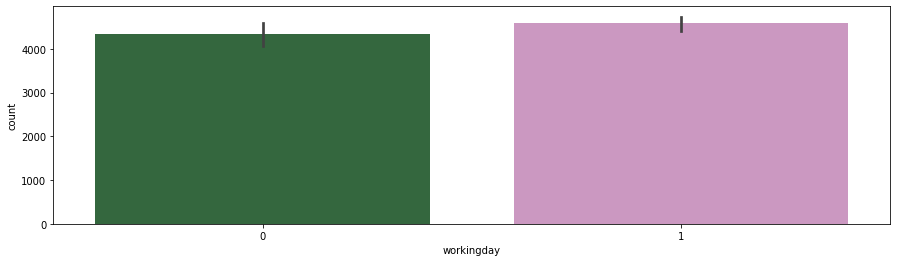

In [112]:
plt.figure(figsize=(15,4))
sns.barplot('workingday','count',data=df,palette="cubehelix")

6) atemp

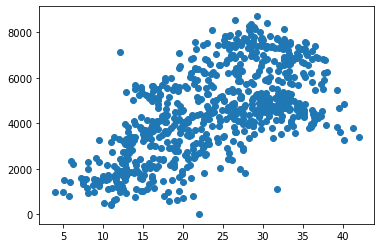

In [113]:
plt.scatter('atemp','count',data=df)

7) temp

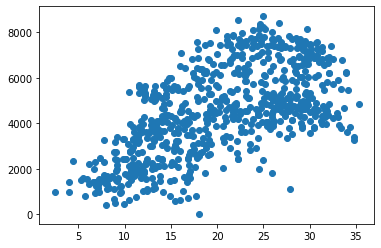

In [114]:
plt.scatter('temp','count',data=df)

8) count

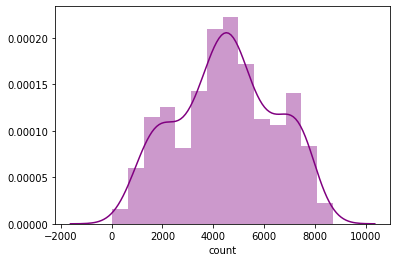

In [115]:
sns.distplot(df['count'],color='Purple')

A normal distribution is observed in case of target variable "Count"

9) humidity

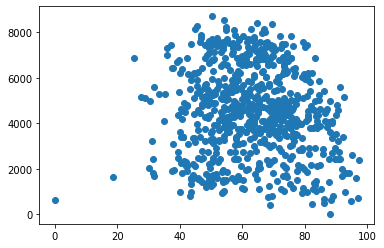

In [116]:
plt.scatter('humidity','count',data=df)

10) Temperature , Humidity and Windspeed

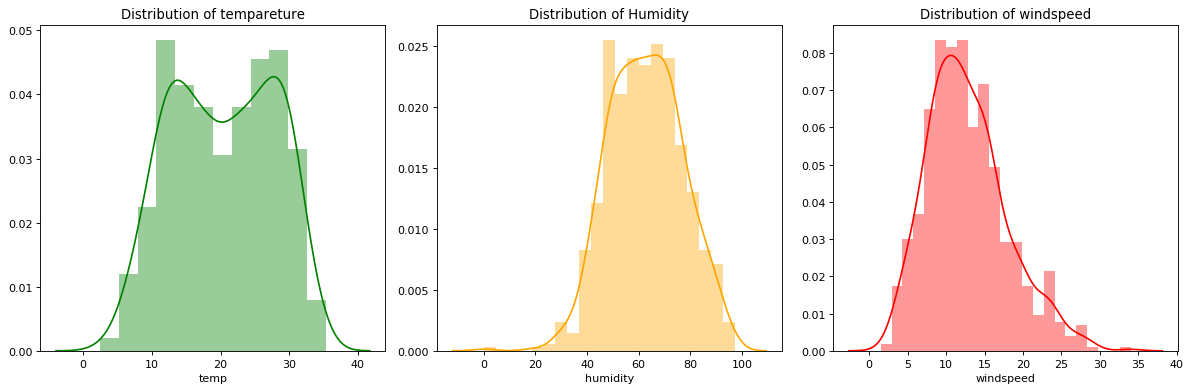

In [117]:
plt.figure(figsize=(15,5), dpi=80)
plt.subplot(1,3,1)
sns.distplot(df['temp'],color='Green')
plt.title("Distribution of tempareture")

plt.subplot(1,3,2)
ax = sns.distplot(df['humidity'],color='Orange')
#ax.set_yscale('log')
plt.title("Distribution of Humidity")

plt.subplot(1,3,3)
sns.distplot(df['windspeed'],color='Red')
plt.title("Distribution of windspeed")
plt.tight_layout()
plt.show()

11) Heatmap

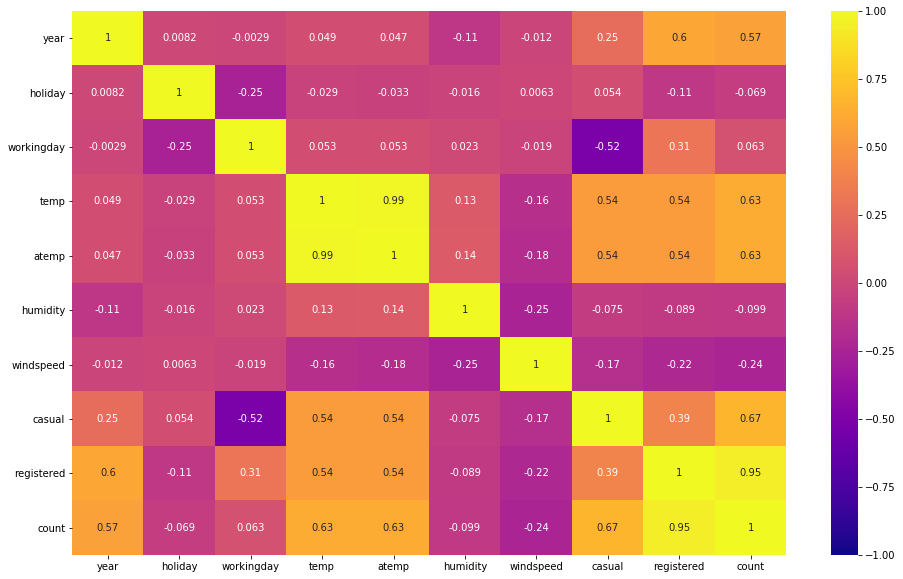

In [118]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, vmin=-1,vmax=1 ,cmap="plasma")
plt.show()

from above heatmap, we can view the following observations:-

  -atemp and temp are highly correlated
  
  -registered,causal,atemp,temp are highly correlated with dependent variable count
  
  -registered and causal are highly correlated

# 3) Data Preparation

casual and registered are dropped because their addition gives us the target variable "Count"

In [21]:
bike_df=df.drop(['casual', 'registered'], axis=1)
bike_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,january,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,january,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,january,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,january,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,january,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [22]:
bike_df.shape

(730, 12)

# Creating Dummy Variables:-

Create Dummy variables for month,weekday, weathersit,season, 

In [23]:
months=pd.get_dummies(bike_df['month'],drop_first=True)
weekdays=pd.get_dummies(bike_df['weekday'],drop_first=True)
weather_sit=pd.get_dummies(bike_df['weathersit'],drop_first=True)
seasons=pd.get_dummies(bike_df['season'],drop_first=True)

Combining the results to the original bike dataframe

In [24]:
bike_df=pd.concat([months,weekdays,weather_sit,seasons,bike_df],axis=1)
bike_df.head(3)

,august,december,february,january,july,june,march,may,november,october,...,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,january,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,january,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,january,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349


Drop 'season','month','weekday','weathersit'

In [25]:
bike_df.drop(['season','month','weekday','weathersit'],axis=1,inplace =True)
bike_df.head(3)

,august,december,february,january,july,june,march,may,november,october,...,summer,winter,year,holiday,workingday,temp,atemp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349


## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [26]:
df_train, df_test = train_test_split(bike_df, train_size = 0.7, test_size = 0.3, random_state = 100)

## Step 5 :Rescaling the Features 

Using the Minmax scalar as it handles outliers.

In [27]:
scaler = MinMaxScaler()

In [28]:
num_vars = ['count','humidity','windspeed','temp','atemp']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

C:\Users\Mihir\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Mihir\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [29]:
df_train.head()

,august,december,february,january,july,june,march,may,november,october,...,summer,winter,year,holiday,workingday,temp,atemp,humidity,windspeed,count
653,0,0,0,0,0,0,0,0,0,1,...,0,1,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973


In [30]:
df_train.describe()

,august,december,february,january,july,june,march,may,november,october,...,summer,winter,year,holiday,workingday,temp,atemp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,...,0.245098,0.24902,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,...,0.430568,0.43287,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Checking the correlation coefficients to see which variables are highly correlated

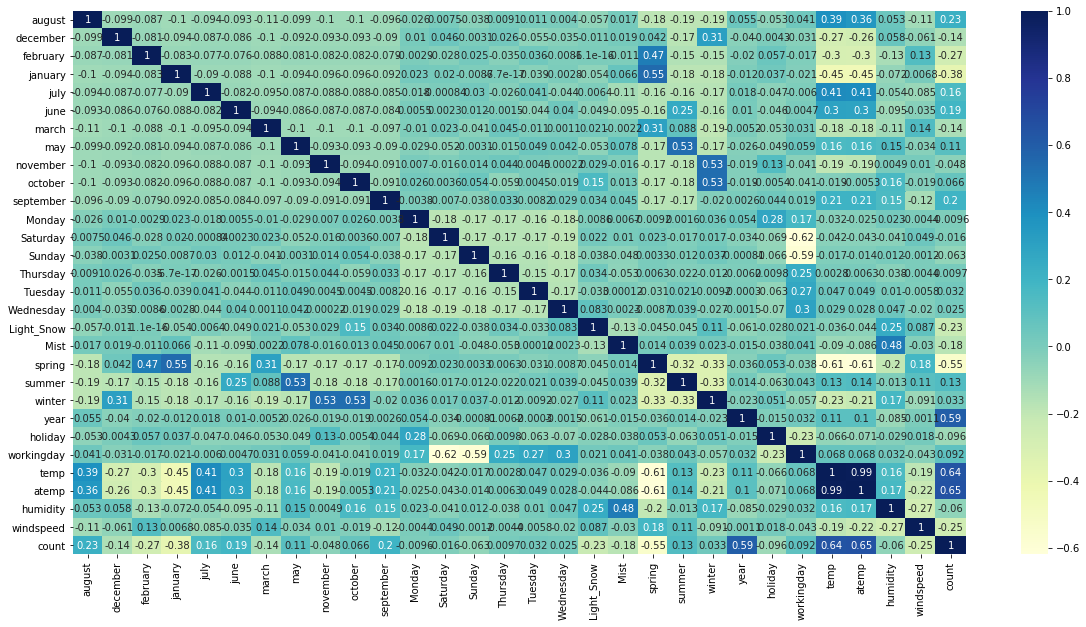

In [31]:
plt.figure(figsize = (20, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

We'll first build a model using all the columns

### Dividing into X and Y sets for the model building

In [32]:
y_train = df_train.pop('count')
X_train = df_train

## Step 6: Building a linear model

Fit a regression line through the training data using `statsmodels`. In `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [33]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 13)             # running RFE
rfe = rfe.fit(X_train, y_train)

C:\Users\Mihir\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=13 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [34]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('august', False, 10),
 ('december', False, 5),
 ('february', False, 6),
 ('january', False, 3),
 ('july', True, 1),
 ('june', False, 17),
 ('march', False, 14),
 ('may', False, 9),
 ('november', False, 4),
 ('october', False, 11),
 ('september', True, 1),
 ('Monday', False, 15),
 ('Saturday', True, 1),
 ('Sunday', False, 8),
 ('Thursday', False, 13),
 ('Tuesday', False, 16),
 ('Wednesday', False, 12),
 ('Light_Snow', True, 1),
 ('Mist', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

### Starting with all the columns selected by RFE

### Model 1

In [35]:
#Print Columns selected by RFE. We will start with these columns for manual detection and deletion
col = X_train.columns[rfe.support_]
col

Index(['july', 'september', 'Saturday', 'Light_Snow', 'Mist', 'spring',
       'summer', 'winter', 'year', 'holiday', 'temp', 'humidity', 'windspeed'],
      dtype='object')

In [36]:
X_train.columns[~rfe.support_]

Index(['august', 'december', 'february', 'january', 'june', 'march', 'may',
       'november', 'october', 'Monday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'workingday', 'atemp'],
      dtype='object')

Creating X_test dataframe with RFE selected variables

In [37]:
X_train_rfe = X_train[col]

Adding a constant variable 

In [38]:
X_train_rfe = sm.add_constant(X_train_rfe)

Create a first fitted model

In [40]:
lm = sm.OLS(y_train,X_train_rfe).fit()

Check the parameters obtained

In [41]:
lm.params

const         0.279640
july         -0.057853
september     0.082751
Saturday      0.017490
Light_Snow   -0.239456
Mist         -0.054750
spring       -0.056290
summer        0.052092
winter        0.098387
year          0.229791
holiday      -0.094469
temp          0.530609
humidity     -0.168105
windspeed    -0.183143
dtype: float64

A summary of the linear regression model obtained

In [42]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          7.51e-190
Time:                        11:56:13   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -993.5
Df Residuals:                     496   BIC:                            -934.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2796      0.035      8.096      0.000       0.212       0.348
july          -0.0579      0.018     -3.162      0.002      -0.094      -0.022
september      0.0828      0.017      4.952      0.000       0.050       0.116
Saturday       0.0175      0.011      1.575      0.116      -0.004       0.039
Light_Snow    -0.2395      0.026     -9.090      0.000      -0.291      -0.188
Mist          -0.0547      0.011     -5.211      0.000      -0.075      -0.034
spring        -0.0563      0.021     -2.701      0.007      -0.097      -0.015
summer         0.0521      0.015      3.472      0.001       0.023       0.082
winter         0.0984      0.017      5.706      0.000       0.065       0.132
year           0.2298      0.008     28.298      0.000       0.214       0.246
holiday       -0.0945      0.026     -3.690      0.000      -0.145      -0.044
temp           0.5306      0.034     15.779      0.000       0.465       0.597
humidity      -0.1681      0.038     -4.450      0.000      -0.242      -0.094
windspeed     -0.1831      0.026     -7.120      0.000      -0.234      -0.133
==============================================================================
Omnibus:                       63.307   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.410
Skew:                          -0.685   Prob(JB):                     1.45e-30
Kurtosis:                       5.143   Cond. No.                         19.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Drop Saturday since it has p > 0.05

In [43]:
X_train_new = X_train_rfe.drop(["Saturday"], axis = 1)

Rebuilding the model without 'weekday_Saturday'

### Model 2

In [44]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [45]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model FOR 2ND TIME

In [46]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.69e-190
Time:                        11:57:55   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2841      0.034      8.242      0.000       0.216       0.352
july          -0.0575      0.018     -3.140      0.002      -0.094      -0.022
september      0.0830      0.017      4.962      0.000       0.050       0.116
Light_Snow    -0.2382      0.026     -9.034      0.000      -0.290      -0.186
Mist          -0.0542      0.011     -5.151      0.000      -0.075      -0.034
spring        -0.0562      0.021     -2.695      0.007      -0.097      -0.015
summer         0.0519      0.015      3.457      0.001       0.022       0.081
winter         0.0987      0.017      5.719      0.000       0.065       0.133
year           0.2293      0.008     28.219      0.000       0.213       0.245
holiday       -0.0974      0.026     -3.809      0.000      -0.148      -0.047
temp           0.5300      0.034     15.739      0.000       0.464       0.596
humidity      -0.1710      0.038     -4.526      0.000      -0.245      -0.097
windspeed     -0.1819      0.026     -7.066      0.000      -0.233      -0.131
==============================================================================
Omnibus:                       57.560   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.574
Skew:                          -0.610   Prob(JB):                     2.69e-29
Kurtosis:                       5.169   Cond. No.                         19.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking VIF for multicollinearity

In [47]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,74.38
5,spring,5.02
10,temp,3.61
7,winter,3.49
6,summer,2.61
11,humidity,1.90
4,Mist,1.56
1,july,1.48
2,september,1.30
3,Light_Snow,1.24


#### We generally want a VIF that is less than 5. So we can see some variables we need to drop.

In [48]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [49]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,humidity,28.06
9,temp,16.02
11,windspeed,4.65
4,spring,4.01
6,winter,3.35
5,summer,2.78
3,Mist,2.28
7,year,2.08
0,july,1.58
1,september,1.38


### Final Model - Model 3 

Drop humidity from the model

In [50]:
X_train_new = X_train_new.drop(['humidity'], axis=1)

In [51]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Create a first fitted model
lm = sm.OLS(y_train,X_train_lm).fit()   

In [52]:
# Check the summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          2.40e-187
Time:                        12:00:31   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1996      0.030      6.758      0.000       0.142       0.258
july          -0.0524      0.019     -2.811      0.005      -0.089      -0.016
september      0.0767      0.017      4.511      0.000       0.043       0.110
Light_Snow    -0.2852      0.025    -11.536      0.000      -0.334      -0.237
Mist          -0.0816      0.009     -9.301      0.000      -0.099      -0.064
spring        -0.0669      0.021     -3.167      0.002      -0.108      -0.025
summer         0.0453      0.015      2.971      0.003       0.015       0.075
winter         0.0831      0.017      4.818      0.000       0.049       0.117
year           0.2335      0.008     28.361      0.000       0.217       0.250
holiday       -0.0980      0.026     -3.761      0.000      -0.149      -0.047
temp           0.4915      0.033     14.798      0.000       0.426       0.557
windspeed     -0.1480      0.025     -5.893      0.000      -0.197      -0.099
==============================================================================
Omnibus:                       59.298   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.189
Skew:                          -0.628   Prob(JB):                     4.41e-30
Kurtosis:                       5.187   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,5.09
10,windspeed,4.60
5,summer,2.21
4,spring,2.08
7,year,2.07
6,winter,1.79
0,july,1.58
3,Mist,1.55
1,september,1.34
2,Light_Snow,1.08


## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (Assumptions of linear regression).

Plot the histogram of the error terms and see what it looks like.

In [54]:
y_train_cnt = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

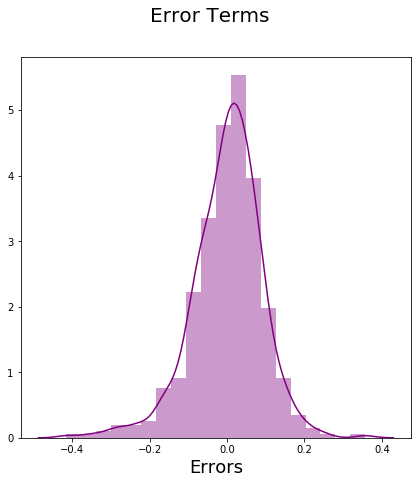

In [59]:
# Plot the histogram of the error terms
fig = plt.figure(figsize=(7,7))
sns.distplot((y_train - y_train_cnt), bins = 20,color='Purple')
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)                         

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, we now move to predictions using the final, i.e. third model.

#### Applying the scaling on the test sets

In [60]:
num_vars = ['count','humidity','windspeed','temp','atemp']


df_test[num_vars] = scaler.transform(df_test[num_vars])

C:\Users\Mihir\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Mihir\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [61]:
df_test.describe()

,august,december,february,january,july,june,march,may,november,october,...,summer,winter,year,holiday,workingday,temp,atemp,humidity,windspeed,count
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,...,0.264840,0.232877,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592
std,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,...,0.442259,0.423633,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


#### Dividing into X_test and y_test

In [62]:
y_test = df_test.pop('count')
X_test = df_test

In [63]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [64]:
# predicting using values used by the final model
test_col = X_train_lm.columns
X_test=X_test[test_col[1:]]
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [65]:
# Making predictions using the fourth model

y_pred = lm.predict(X_test)

In [66]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8049418440982381

In [67]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

0.009264444750858143

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Plot the y_test and y_pred to understand the spread.

Text(0, 0.5, 'y_pred')

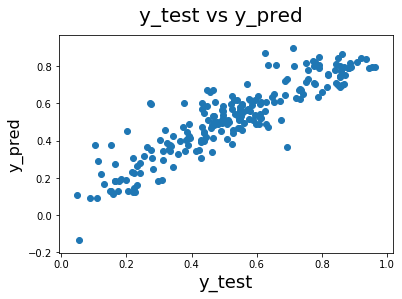

In [68]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16)      

In [69]:
param = pd.DataFrame(lm.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,12))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param


,Variables,Coefficient value
index,,
10,temp,0.491508
8,year,0.233482
0,const,0.199648
7,winter,0.083084
2,september,0.076686
6,summer,0.045280
1,july,-0.052418
5,spring,-0.066942
4,Mist,-0.081558


### Thus, the equation of our best fitted line is as follows:

##### count = 0.199648 + 0.491508  X  temp + 0.233482  X  year + 0.083084 X winter + 0.076686 X september + 0.045280 X summer -0.052418 X july -0.066942 X spring -0.081558 X Mist -0.098013 X holiday -0.147977 X windspeed -0.285155 X Light_Snow


# Model Evaluation and Results:-
- R-squared on training data: 0.836
- R-squared on testing data:  0.804

### Conclusions:-
##### -The increase in positive coefficients like temp,year, winter , september, summer will lead to the increase in the value of target variable count.
##### -The negative coefficients indicate that an increase in these values will lead to an decrease in the value of target variable count.
##### -Temp is the most significant with the largest coefficient value.
##### -The rentals have decreased during holidays
##### -Bike rentals is more for the month of september than others.
##### -Bike rentals are more prominent in the "fall" followed by "summer"
##### -Bike rentals have significantly increased from the year 2018 to 2019.